In [3]:
import tensorflow as tf

## Loading MNIST Dataset

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
#dividing the dataset into train and test datasets
(x_train,y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

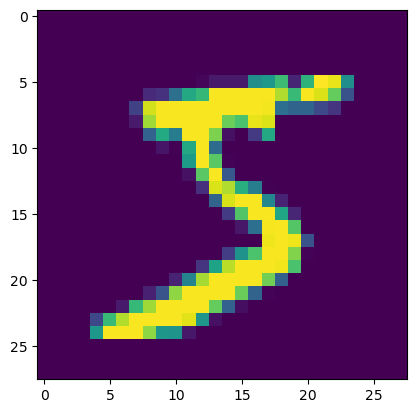

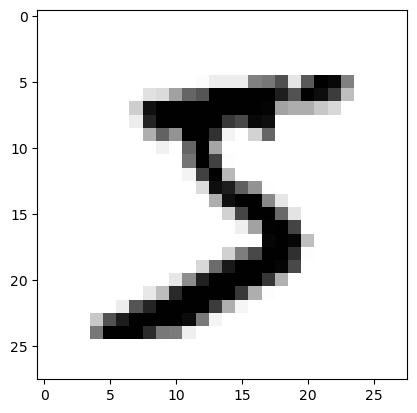

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
#checking the values of each pixel before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

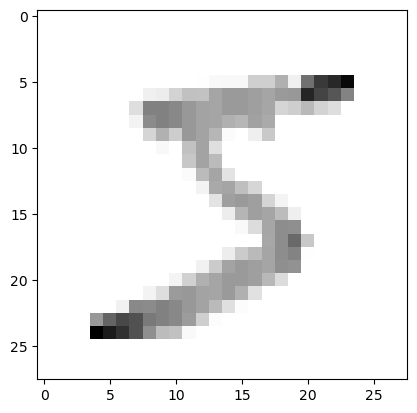

In [12]:
#Normalization
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [13]:
#After Normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
#checking labels for the image
print(y_train[0])

5


## Resizing image to make it suitable to apply Convolution operation

In [15]:
import numpy as np 
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernel operation
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

In [21]:
#creating a neural network now
model = Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling

#second convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [23]:
print("Total traning samples = ",len(x_trainr))

Total traning samples =  60000


## Training & Testing

In [29]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
#training the model
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7fcd940571a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7fcd940571a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original e

In [31]:
#evaluating on testing dataset
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9834
Test Loss on 10,000 test samples 0.9833999872207642


In [32]:
predictions = model.predict([x_testr])
predictions

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fcd9368a160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fcd9368a160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original err

array([[1.03311405e-11, 6.35737907e-09, 5.66721825e-09, ...,
        9.99999940e-01, 1.52561952e-09, 2.20049023e-09],
       [3.51274934e-07, 9.23843757e-08, 9.99988139e-01, ...,
        1.48453196e-07, 3.58185943e-08, 5.97027805e-09],
       [3.17665588e-10, 9.99999940e-01, 2.15971074e-10, ...,
        2.18637162e-08, 2.53968457e-10, 2.27896521e-10],
       ...,
       [1.98843377e-15, 5.90895444e-10, 1.83398652e-13, ...,
        1.38403577e-09, 8.18013626e-12, 1.15147891e-10],
       [1.63906406e-11, 4.13138577e-12, 1.41307542e-14, ...,
        4.24655189e-12, 4.19427018e-08, 3.37691611e-11],
       [1.04258033e-05, 8.98003876e-08, 2.34831262e-07, ...,
        2.34516140e-09, 2.64354298e-06, 7.00460774e-08]], dtype=float32)

In [33]:
print(np.argmax(predictions[0]))

7


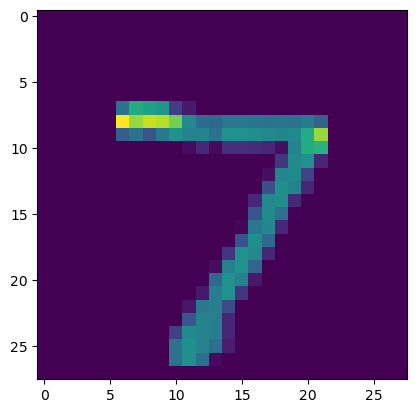

In [34]:
plt.imshow(x_test[0])

In [35]:
print(np.argmax(predictions[128]))

8


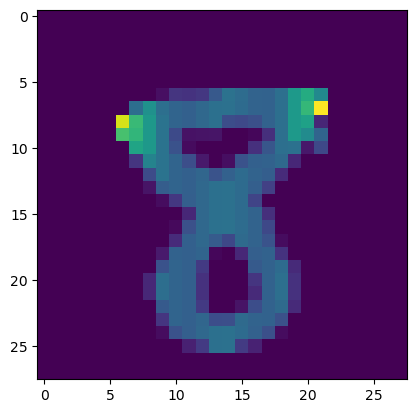

In [36]:
plt.imshow(x_test[128])

## Custom Input

In [96]:
import cv2
img = cv2.imread("test.png")

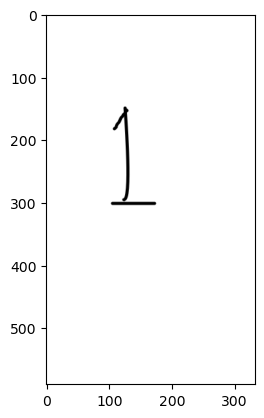

In [97]:
plt.imshow(img)

In [89]:
img.shape

(590, 333, 3)

In [90]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [91]:
resized.shape

(28, 28)

In [92]:
newimg = tf.keras.utils.normalize(resized,axis=1) #0 to 1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #kernel operation of convolution layer

In [93]:
newimg.shape

(1, 28, 28, 1)

In [94]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 12ms/step


In [95]:
print(np.argmax(predictions))

1
